# 3. 심화 3 ~ 4

In [1]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 19.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.9.0 which is incompatible.
tensorflow 2.11.0 requires tensorboard<2.12,>=2.11, but you have tensorboard 2.9.1 which is incompatible.
tensorflow 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.9.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have pr

In [1]:
import mysql.connector

## 📍 localhost 접속

In [2]:
import mysql.connector

local = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "a6643035"
)

local.close()

In [3]:
# 특정 데이터베이스 바로 접속
local = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "a6643035",
    database = "zerobase"
)
# 접속 끊기
local.close()

## 📍 AWS RDS 접속

In [4]:
# AWS RDS 접속
remote = mysql.connector.connect(
    host = "database-1.cicfmbqntnlk.ap-southeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "admin1234"
)
remote.close()

In [5]:
# 특정 데이터베이스 바로 접속
remote = mysql.connector.connect(
    host = "database-1.cicfmbqntnlk.ap-southeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "admin1234",
    database = "zerobase"
)
remote.close()

## 📍 Query를 실행하기 위한 코드

In [ ]:
# Query를 실행하기 위한 코드
import mysql.connector


mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "a6643035",
    database = "zerobase"
)

mycursor = mydb.cursor()
mycursor.execute(<query>);

In [7]:
# 테이블 생성
remote = mysql.connector.connect(
    host = "database-1.cicfmbqntnlk.ap-southeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "admin1234",
    database = "zerobase"
)
cur = remote.cursor()
cur.execute("CREATE TABLE sql_file(id INT, filename VARCHAR(16))")

remote.close()

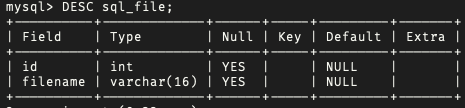

In [10]:
# 테이블 삭제
remote = mysql.connector.connect(
    host = "database-1.cicfmbqntnlk.ap-southeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "admin1234",
    database = "zerobase"
)

cur = remote.cursor()
cur.execute("DROP TABLE sql_file")

remote.close()

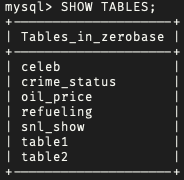

## 📍 SQL FILE 을 실행하기 위한 코드

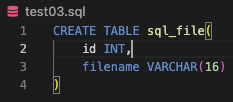

In [33]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "a6643035",
    database = "zerobase"
)

cur = mydb.cursor()
sql = open("test03.sql").read()

cur.execute(sql)

mydb.close()

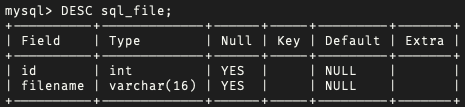

## 📍 SQL FILE 내에 Query가 여러개 존재하는 경우

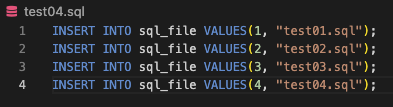

In [37]:
# multi=True
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "a6643035",
    database = "zerobase"
)

cur = mydb.cursor()
sql = open("test04.sql").read()

for result_iterator in cur.execute(sql, multi=True):
    if result_iterator.with_rows:
        print(result_iterator.fetchall())
    else:
        print(result_iterator.statement)
        
mydb.commit()
mydb.close()

INSERT INTO sql_file VALUES(1, "test01.sql")
INSERT INTO sql_file VALUES(2, "test02.sql")
INSERT INTO sql_file VALUES(3, "test03.sql")
INSERT INTO sql_file VALUES(4, "test04.sql")


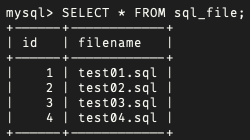

### 🔌 코드에 대한 추가 설명
- 파이썬 코드에서 multi=True 옵션을 사용하면, 이러한 여러 INSERT INTO 문을 한 번에 실행할 수 있습니다. 
- 이렇게 하면, 각 INSERT INTO 문이 데이터베이스에 적용되고, 트랜잭션이 커밋되기 전까지는 변경사항이 데이터베이스에 영구적으로 저장되지 않습니다.
- mydb.commit( )을 호출하면 모든 변경사항이 데이터베이스에 적용됩니다.

- 이러한 INSERT INTO 문들은 일반적으로 with_rows 속성이 False로 설정되므로, result_iterator.statement를 출력하는 부분이 실행될 것입니다. 
- 이는 각 INSERT INTO 문을 출력해 줍니다.



## 📍 Fetch All
- fetchall( ) 메서드는 SQL 쿼리로부터 반환된 모든 행을 가져오는 데 사용됩니다.
- 이 메서드는 보통 execute( ) 메서드로 SQL 쿼리를 실행한 후에 호출됩니다

### ❗️주의
- fetchall( )은 쿼리의 모든 결과를 메모리에 로드하기 때문에, 결과가 매우 큰 경우에는 메모리 문제가 발생할 수 있습니다. 
- 이런 경우에는 fetchone( ) 또는 fetchmany(size)를 사용할 수 있습니다.

In [ ]:
# 데이터베이스 연결
mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="yourdatabase"
)

# 커서 객체 생성
mycursor = mydb.cursor()

# SQL 쿼리 실행
mycursor.execute("SELECT * FROM your_table")

# 모든 행 가져오기
result = mycursor.fetchall()

# 결과 출력
for row in result:
  print(row)

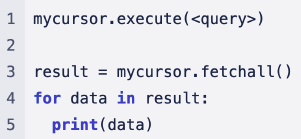

## 📍 sql_file 테이블 조회( 읽어올 데이터 양이 많은 경우 buffered=True)

In [31]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "a6643035",
    database = "zerobase"
);

cur = mydb.cursor(buffered=True)
cur.execute("SELECT * FROM sql_file")

result = cur.fetchall()

for result_iterator in result:
    print(result_iterator)
    
mydb.close()

(1, 'test01.sql')
(2, 'test02.sql')
(3, 'test03.sql')
(4, 'test04.sql')


### ⚡️ buffered=True
- buffered=True 옵션은 MySQL 커넥터의 cursor( ) 메서드에서 사용할 수 있습니다. 
- 이 옵션을 설정하면, SQL 쿼리가 실행된 후 결과가 즉시 클라이언트로 가져와져 내부 버퍼에 저장됩니다. 
- 이렇게 하면 커서를 여러 번 반복할 수 있고, 같은 결과셋을 여러 번 사용할 수 있습니다.

In [ ]:
# buffered=True 없이
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM table_name")

for row in mycursor:
    print(row)

# 이 시점에서 커서는 결과셋을 완전히 소진했으므로, 다시 반복할 수 없습니다.

In [ ]:
# buffered=True 사용
mycursor = mydb.cursor(buffered=True)
mycursor.execute("SELECT * FROM table_name")

for row in mycursor:
    print(row)

# buffered=True 때문에, 같은 결과셋을 다시 반복할 수 있습니다.
for row in mycursor:
    print(row)


### ❗️장점과 단점
- 장점
    - 결과셋을 여러 번 반복할 수 있습니다.
    - 결과가 크더라도, 서버에서 결과를 한 번에 하나씩 가져오는 것이 아니라 전체 결과를 한 번에 가져옵니다. 
    - 이로 인해 네트워크 지연이 줄어듭니다.
- 단점
    - 결과셋이 매우 큰 경우, 모든 데이터를 클라이언트의 메모리에 로드해야 하므로 메모리 문제가 발생할 수 있습니다.
    - buffered=True는 특정 상황에서 유용할 수 있지만, 결과셋이 크거나 메모리 사용에 민감한 애플리케이션에서는 주의가 필요합니다.

### ⚡️ 검색결과를 Pandas 로 읽기

In [45]:
import pandas as pd

df = pd.DataFrame(result)
df

,0,1
0,1,test01.sql
1,2,test02.sql
2,3,test03.sql
3,4,test04.sql


# Python with CSV

## 📍 CSV 에 있는 데이터를 Python 으로 INSERT

In [50]:
df = pd.read_csv('./police_station.csv')
df.head()

,서울특별시경찰청,서울시 종로구 사직로8길 31
0,서울중부경찰서,서울특별시 중구 수표로 27
1,서울종로경찰서,서울특별시 종로구 율곡로 46
2,서울남대문경찰서,서울특별시 중구 한강대로 410
3,서울서대문경찰서,서울특별시 서대문구 통일로 113
4,서울혜화경찰서,서울특별시 종로구 창경궁로 112-16


In [52]:
remote = mysql.connector.connect(
    host = "database-1.cicfmbqntnlk.ap-southeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "admin1234",
    database = "zerobase"
)
# cursor 생성
cur = remote.cursor(buffered=True)
# INSERT 문 만들기
sql = "INSERT INTO police_station VALUES(%s, %s)"

In [60]:
for i, row in df.iterrows():
    cur.execute(sql, tuple(row))
    print(tuple(row))
    remote.commit() # commit() 은 database 에 적용하기 위한 명령

('서울중부경찰서', '서울특별시 중구 수표로 27')
('서울종로경찰서', '서울특별시 종로구 율곡로 46')
('서울남대문경찰서', '서울특별시 중구 한강대로 410')
('서울서대문경찰서', '서울특별시 서대문구 통일로 113')
('서울혜화경찰서', '서울특별시 종로구 창경궁로 112-16')
('서울용산경찰서', '서울특별시 용산구 원효로89길 24')
('서울성북경찰서', '서울특별시 성북구 보문로 170')
('서울동대문경찰서', '서울특별시 동대문구 약령시로 21길 29')
('서울마포경찰서', '서울특별시 마포구 마포대로 183')
('서울영등포경찰서', '서울특별시 영등포구 국회대로 608')
('서울성동경찰서', '서울특별시 성동구 왕십리광장로 9')
('서울동작경찰서', '서울특별시 동작구 노량진로 148')
('서울광진경찰서', '서울특별시 광진구 광나루로 447 광진소방서 임시청사 (능동)')
('서울서부경찰서', '서울특별시 은평구 은평로9길 15')
('서울강북경찰서', '서울특별시 강북구 오패산로 406')
('서울금천경찰서', '서울특별시 관악구 남부순환로 1435')
('서울중랑경찰서', '서울특별시 중랑구 중랑역로 137')
('서울강남경찰서', '서울특별시 강남구 테헤란로 114길 11')
('서울관악경찰서', '서울특별시 관악구 관악로5길 33')
('서울강서경찰서', '서울특별시 양천구 화곡로 73')
('서울강동경찰서', '서울특별시 강동구 성내로 33')
('서울종암경찰서', '서울특별시 성북구 종암로 135')
('서울구로경찰서', '서울특별시 구로구 가마산로 235')
('서울서초경찰서', '서울특별시 서초구 반포대로 179')
('서울양천경찰서', '서울특별시 양천구 목동동로 99')
('서울송파경찰서', '서울특별시 송파구 중대로 221')
('서울노원경찰서', '서울특별시 노원구 노원로 283')
('서울방배경찰서', '서울특별시 서초구 방배천로 54')
('서울도봉경찰서', '서울특별시 도봉구 노해로 40

In [61]:
# 결과확인
cur.execute("SELECT * FROM police_station")

result = cur.fetchall()
for row in result:
    print(row)

('서울중부경찰서', '서울특별시 중구 수표로 27')
('서울종로경찰서', '서울특별시 종로구 율곡로 46')
('서울남대문경찰서', '서울특별시 중구 한강대로 410')
('서울서대문경찰서', '서울특별시 서대문구 통일로 113')
('서울혜화경찰서', '서울특별시 종로구 창경궁로 112-16')
('서울용산경찰서', '서울특별시 용산구 원효로89길 24')
('서울성북경찰서', '서울특별시 성북구 보문로 170')
('서울동대문경찰서', '서울특별시 동대문구 약령시로 21길 29')
('서울마포경찰서', '서울특별시 마포구 마포대로 183')
('서울영등포경찰서', '서울특별시 영등포구 국회대로 608')
('서울성동경찰서', '서울특별시 성동구 왕십리광장로 9')
('서울동작경찰서', '서울특별시 동작구 노량진로 148')
('서울광진경찰서', '서울특별시 광진구 광나루로 447 광진소방서 임시청사 (능동)')
('서울서부경찰서', '서울특별시 은평구 은평로9길 15')
('서울강북경찰서', '서울특별시 강북구 오패산로 406')
('서울금천경찰서', '서울특별시 관악구 남부순환로 1435')
('서울중랑경찰서', '서울특별시 중랑구 중랑역로 137')
('서울강남경찰서', '서울특별시 강남구 테헤란로 114길 11')
('서울관악경찰서', '서울특별시 관악구 관악로5길 33')
('서울강서경찰서', '서울특별시 양천구 화곡로 73')
('서울강동경찰서', '서울특별시 강동구 성내로 33')
('서울종암경찰서', '서울특별시 성북구 종암로 135')
('서울구로경찰서', '서울특별시 구로구 가마산로 235')
('서울서초경찰서', '서울특별시 서초구 반포대로 179')
('서울양천경찰서', '서울특별시 양천구 목동동로 99')
('서울송파경찰서', '서울특별시 송파구 중대로 221')
('서울노원경찰서', '서울특별시 노원구 노원로 283')
('서울방배경찰서', '서울특별시 서초구 방배천로 54')
('서울도봉경찰서', '서울특별시 도봉구 노해로 40

In [68]:
df = pd.DataFrame(result)
df.head()

,0,1,2,3,4
0,2020,중부,살인,발생,1
1,2020,중부,살인,검거,1
2,2020,중부,강도,발생,3
3,2020,중부,강도,검거,4
4,2020,중부,"강간,추행",발생,113


## 📎 crime_status 테이블에 2020_crime.csv 데이터를 입력하는 코드를 작성

In [64]:
df_crime = pd.read_csv("./2020_crime.csv", encoding="euc-kr")
df_crime.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,3
3,중부,강도,검거,4
4,중부,"강간,추행",발생,113


In [66]:
# 접속
conn = mysql.connector.connect(
    host = "database-1.cicfmbqntnlk.ap-southeast-2.rds.amazonaws.com", 
    port = 3306,
    user = "admin",
    password = "admin1234",
    database = "zerobase"
)
# 객체 생성
cursor = conn.cursor(buffered=True)
# 쿼리 정의
sql = "INSERT INTO crime_status VALUES(2020, %s, %s, %s, %s)"

for i , row in df_crime.iterrows(): # df_crime의 row 한줄 한줄 반환
    cursor.execute(sql, tuple(row)) # 반환한 열 sql 쿼리문에 적용하고 실행
    print(tuple(row))               # 반환한 열 print
    conn.commit()                   # 데이터 커밋으로 저장

('중부', '살인', '발생', 1)
('중부', '살인', '검거', 1)
('중부', '강도', '발생', 3)
('중부', '강도', '검거', 4)
('중부', '강간,추행', '발생', 113)
('중부', '강간,추행', '검거', 76)
('중부', '절도', '발생', 943)
('중부', '절도', '검거', 495)
('중부', '폭력', '발생', 997)
('중부', '폭력', '검거', 830)
('종로', '살인', '발생', 9)
('종로', '살인', '검거', 6)
('종로', '강도', '발생', 4)
('종로', '강도', '검거', 4)
('종로', '강간,추행', '발생', 115)
('종로', '강간,추행', '검거', 93)
('종로', '절도', '발생', 602)
('종로', '절도', '검거', 284)
('종로', '폭력', '발생', 964)
('종로', '폭력', '검거', 792)
('남대문', '살인', '발생', 1)
('남대문', '살인', '검거', 1)
('남대문', '강도', '발생', 2)
('남대문', '강도', '검거', 2)
('남대문', '강간,추행', '발생', 73)
('남대문', '강간,추행', '검거', 52)
('남대문', '절도', '발생', 699)
('남대문', '절도', '검거', 368)
('남대문', '폭력', '발생', 579)
('남대문', '폭력', '검거', 494)
('서대문', '살인', '발생', 3)
('서대문', '살인', '검거', 3)
('서대문', '강도', '발생', 2)
('서대문', '강도', '검거', 1)
('서대문', '강간,추행', '발생', 159)
('서대문', '강간,추행', '검거', 149)
('서대문', '절도', '발생', 1077)
('서대문', '절도', '검거', 524)
('서대문', '폭력', '발생', 1292)
('서대문', '폭력', '검거', 1029)
('혜화', '살인', '발생', 0)
('혜화', 

### ⚡️ 적용한 Table 확인

In [67]:
cursor.execute("SELECT * FROM crime_status")

result = cursor.fetchall()
for row in result:
    print(row)

(2020, '중부', '살인', '발생', 1)
(2020, '중부', '살인', '검거', 1)
(2020, '중부', '강도', '발생', 3)
(2020, '중부', '강도', '검거', 4)
(2020, '중부', '강간,추행', '발생', 113)
(2020, '중부', '강간,추행', '검거', 76)
(2020, '중부', '절도', '발생', 943)
(2020, '중부', '절도', '검거', 495)
(2020, '중부', '폭력', '발생', 997)
(2020, '중부', '폭력', '검거', 830)
(2020, '종로', '살인', '발생', 9)
(2020, '종로', '살인', '검거', 6)
(2020, '종로', '강도', '발생', 4)
(2020, '종로', '강도', '검거', 4)
(2020, '종로', '강간,추행', '발생', 115)
(2020, '종로', '강간,추행', '검거', 93)
(2020, '종로', '절도', '발생', 602)
(2020, '종로', '절도', '검거', 284)
(2020, '종로', '폭력', '발생', 964)
(2020, '종로', '폭력', '검거', 792)
(2020, '남대문', '살인', '발생', 1)
(2020, '남대문', '살인', '검거', 1)
(2020, '남대문', '강도', '발생', 2)
(2020, '남대문', '강도', '검거', 2)
(2020, '남대문', '강간,추행', '발생', 73)
(2020, '남대문', '강간,추행', '검거', 52)
(2020, '남대문', '절도', '발생', 699)
(2020, '남대문', '절도', '검거', 368)
(2020, '남대문', '폭력', '발생', 579)
(2020, '남대문', '폭력', '검거', 494)
(2020, '서대문', '살인', '발생', 3)
(2020, '서대문', '살인', '검거', 3)
(2020, '서대문', '강도', '발생', 2)
(2020, '서대문',

In [69]:
df_result = pd.DataFrame(result)
df_result.head()

,0,1,2,3,4
0,2020,중부,살인,발생,1
1,2020,중부,살인,검거,1
2,2020,중부,강도,발생,3
3,2020,중부,강도,검거,4
4,2020,중부,"강간,추행",발생,113


# 4. 혼자서 해보기

## cctv 파일에서 데이터를 Pandas 로 읽어옵니다.

In [85]:
import pandas as pd

df_cc = pd.read_csv("./Seoul_CCTV.csv", encoding="utf-8")
df_cc.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [73]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [75]:
df_cc.isna().sum()

기관명          0
소계           0
2013년도 이전    0
2014년        0
2015년        0
2016년        0
dtype: int64

## AWS RDS(database-1) zerobase 에 접속합니다.

In [77]:
import mysql
conn = mysql.connector.connect(
    host = "database-1.cicfmbqntnlk.ap-southeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "admin1234",
    database = "zerobase"
)

cursor = conn.cursor(buffered=True)

## cctv Table 을 생성합니다.

In [81]:
sql = "CREATE TABLE cctv (`기관명` VARCHAR(16), `소계` INT, `2013년도 이전` INT, `2014년` INT, `2015년` INT, `2016년` INT)"
cursor.execute(sql)

## 데이터를 cctv 테이블에 INSERT 합니다.

In [82]:
sql = "INSERT INTO cctv VALUES(%s, %s, %s, %s, %s, %s)"

for i, row in df_cc.iterrows():
    cursor.execute(sql, tuple(row))
    print(tuple(row))
    conn.commit()

('강남구', 3238, 1292, 430, 584, 932)
('강동구', 1010, 379, 99, 155, 377)
('강북구', 831, 369, 120, 138, 204)
('강서구', 911, 388, 258, 184, 81)
('관악구', 2109, 846, 260, 390, 613)
('광진구', 878, 573, 78, 53, 174)
('구로구', 1884, 1142, 173, 246, 323)
('금천구', 1348, 674, 51, 269, 354)
('노원구', 1566, 542, 57, 451, 516)
('도봉구', 825, 238, 159, 42, 386)
('동대문구', 1870, 1070, 23, 198, 579)
('동작구', 1302, 544, 341, 103, 314)
('마포구', 980, 314, 118, 169, 379)
('서대문구', 1254, 844, 50, 68, 292)
('서초구', 2297, 1406, 157, 336, 398)
('성동구', 1327, 730, 91, 241, 265)
('성북구', 1651, 1009, 78, 360, 204)
('송파구', 1081, 529, 21, 68, 463)
('양천구', 2482, 1843, 142, 30, 467)
('영등포구', 1277, 495, 214, 195, 373)
('용산구', 2096, 1368, 218, 112, 398)
('은평구', 2108, 1138, 224, 278, 468)
('종로구', 1619, 464, 314, 211, 630)
('중구', 1023, 413, 190, 72, 348)
('중랑구', 916, 509, 121, 177, 109)


## cctv 테이블의 데이터 조회하여 확인합니다.

In [83]:
cursor.execute("SELECT * FROM cctv")

result = cursor.fetchall()
for row in result:
    print(row)

('강남구', '3238', '1292', '430', '584', '932')
('강동구', '1010', '379', '99', '155', '377')
('강북구', '831', '369', '120', '138', '204')
('강서구', '911', '388', '258', '184', '81')
('관악구', '2109', '846', '260', '390', '613')
('광진구', '878', '573', '78', '53', '174')
('구로구', '1884', '1142', '173', '246', '323')
('금천구', '1348', '674', '51', '269', '354')
('노원구', '1566', '542', '57', '451', '516')
('도봉구', '825', '238', '159', '42', '386')
('동대문구', '1870', '1070', '23', '198', '579')
('동작구', '1302', '544', '341', '103', '314')
('마포구', '980', '314', '118', '169', '379')
('서대문구', '1254', '844', '50', '68', '292')
('서초구', '2297', '1406', '157', '336', '398')
('성동구', '1327', '730', '91', '241', '265')
('성북구', '1651', '1009', '78', '360', '204')
('송파구', '1081', '529', '21', '68', '463')
('양천구', '2482', '1843', '142', '30', '467')
('영등포구', '1277', '495', '214', '195', '373')
('용산구', '2096', '1368', '218', '112', '398')
('은평구', '2108', '1138', '224', '278', '468')
('종로구', '1619', '464', '314', '211', '630

## 조회된 데이터를 Pandas 로 변환하여 출력합니다.

In [84]:
df_result = pd.DataFrame(result)
df.head()

,0,1,2,3,4
0,2020,중부,살인,발생,1
1,2020,중부,살인,검거,1
2,2020,중부,강도,발생,3
3,2020,중부,강도,검거,4
4,2020,중부,"강간,추행",발생,113
